<a href="https://colab.research.google.com/github/komorimasashi/kakuritsu_toukei_1/blob/main/chapter1/Chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 心理学と時系列データ分析

必要なパッケージのインストール

In [10]:
targetPackages <- c('spatstat') 
newPackages <- targetPackages[!(targetPackages %in% installed.packages()[,"Package"])]
if(length(newPackages)) install.packages(newPackages)

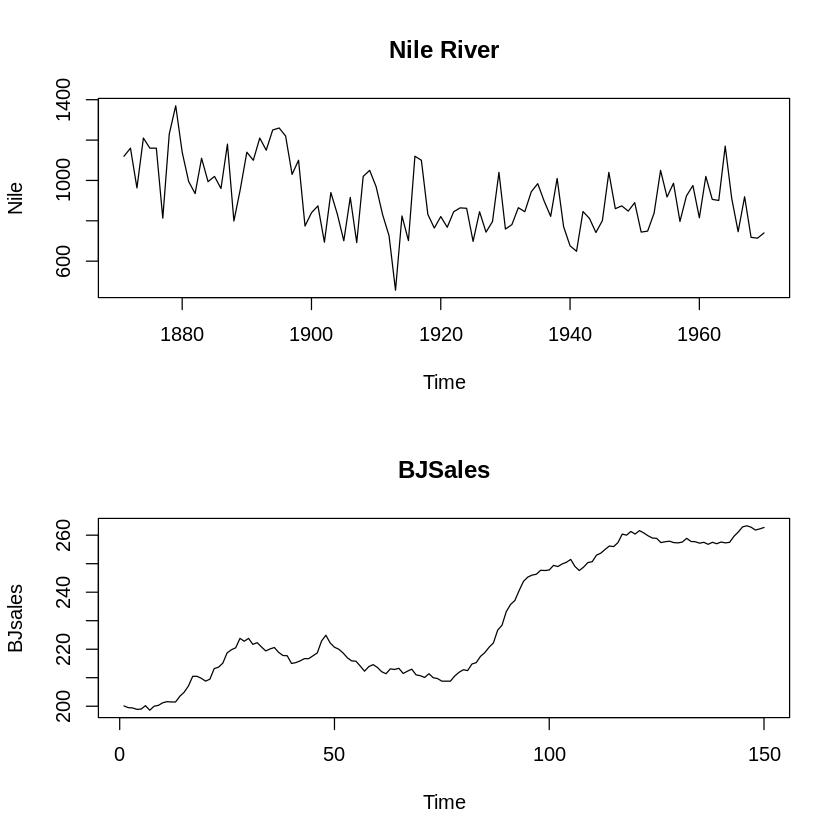

In [11]:
#図1.2_Rの標準データセットに含まれる時系列データの例
par(mfrow=c(2,1))
ts.plot(Nile, main="Nile River")
ts.plot(BJsales, main="BJSales")

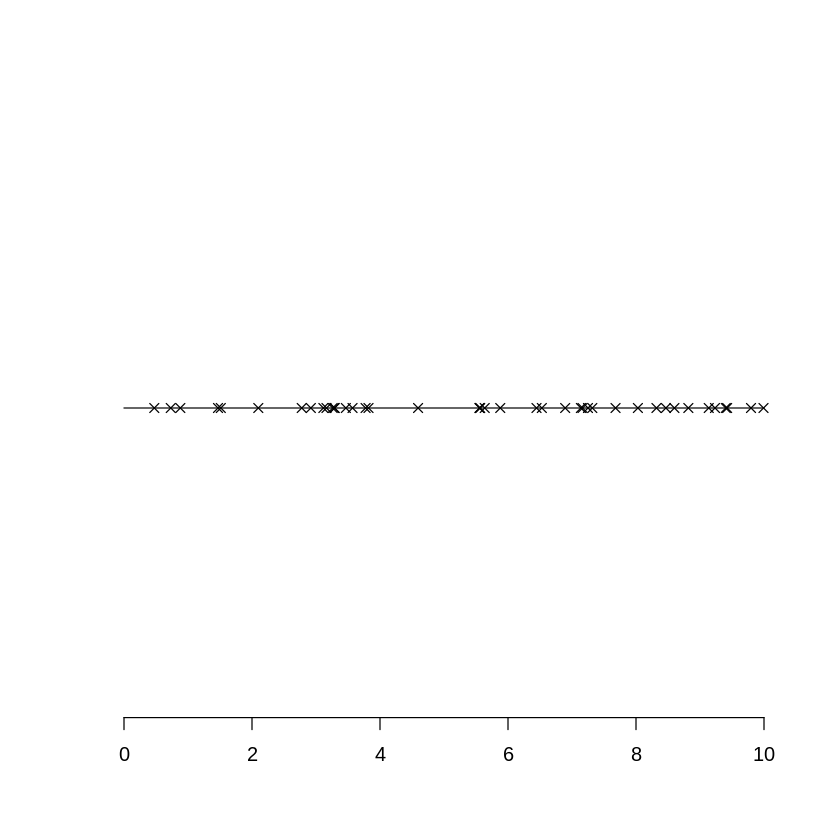

In [12]:
# 図1.3_点過程データを表す１次元のストリップチャート
library(spatstat)
x_start <- 0
x_end <- 10
endpoints <- ppp(x=c(x_start, x_end), y=c(0,0), window = owin(c(x_start, x_end), c(-.1,.1)))
L <- linnet(endpoints, edges = matrix(c(1,2),ncol = 2))
X <- rpoislpp(lambda = 4, L = L)
plot(X, pch = 4, lwd = 1, main = "")
axis(1)

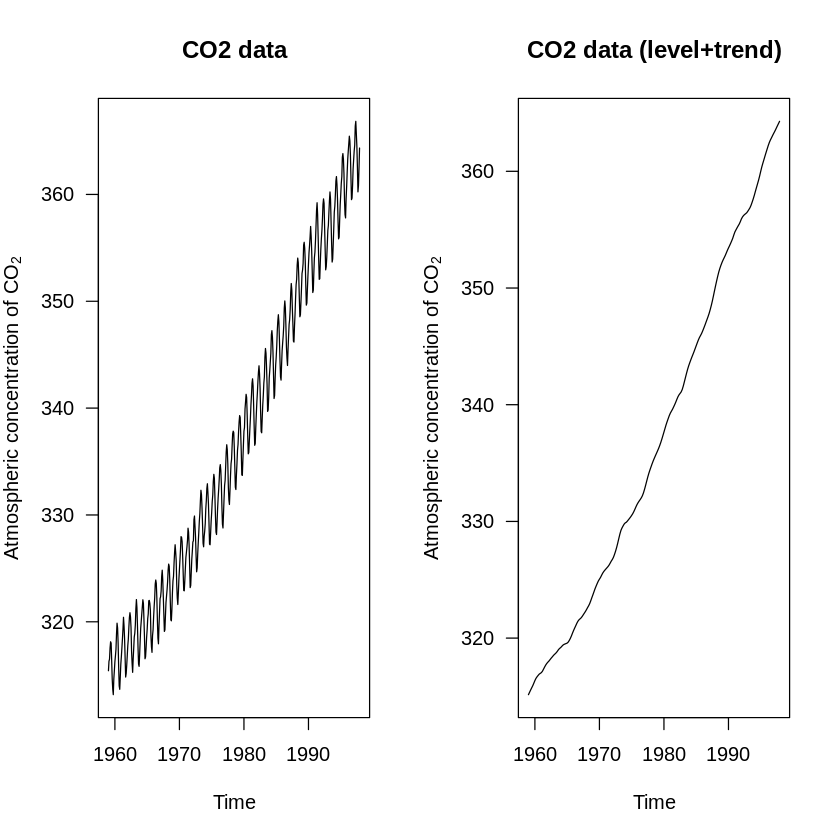

In [13]:
# 図1.7_CO2濃度とレベル・トレンド成分
par(mfrow=c(1,2))
plot(co2, ylab = expression("Atmospheric concentration of CO"[2]),
     las = 1)
title(main = "CO2 data")

stlco2 <- stl(co2,s.window="per", robust=TRUE)
plot(stlco2[1]$time.series[,2], ylab = expression("Atmospheric concentration of CO"[2]),
     las = 1)
title(main = "CO2 data (level+trend)")

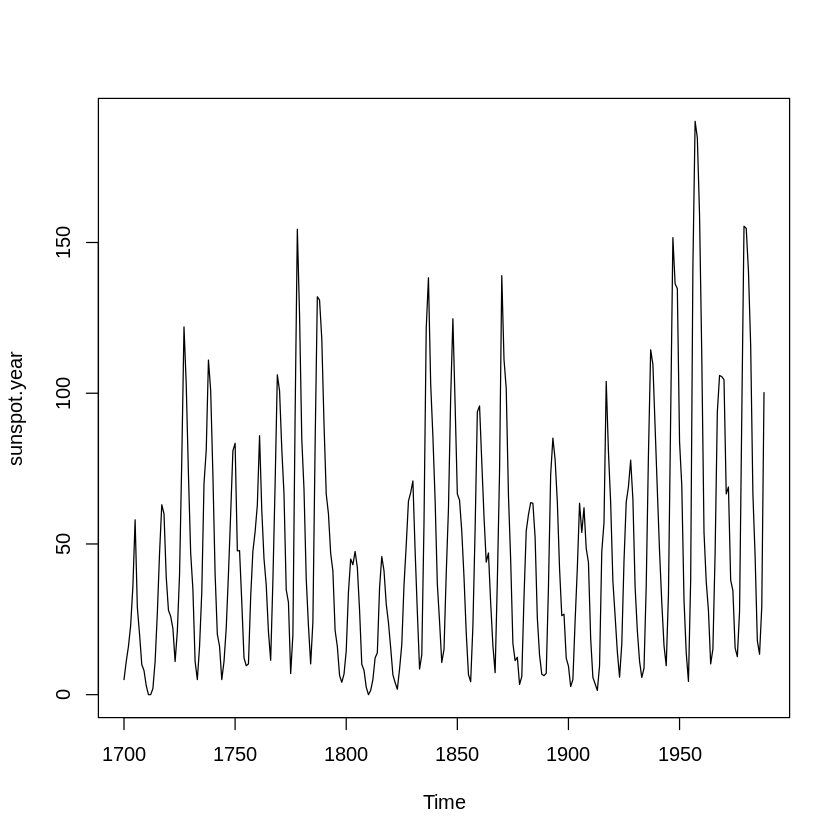

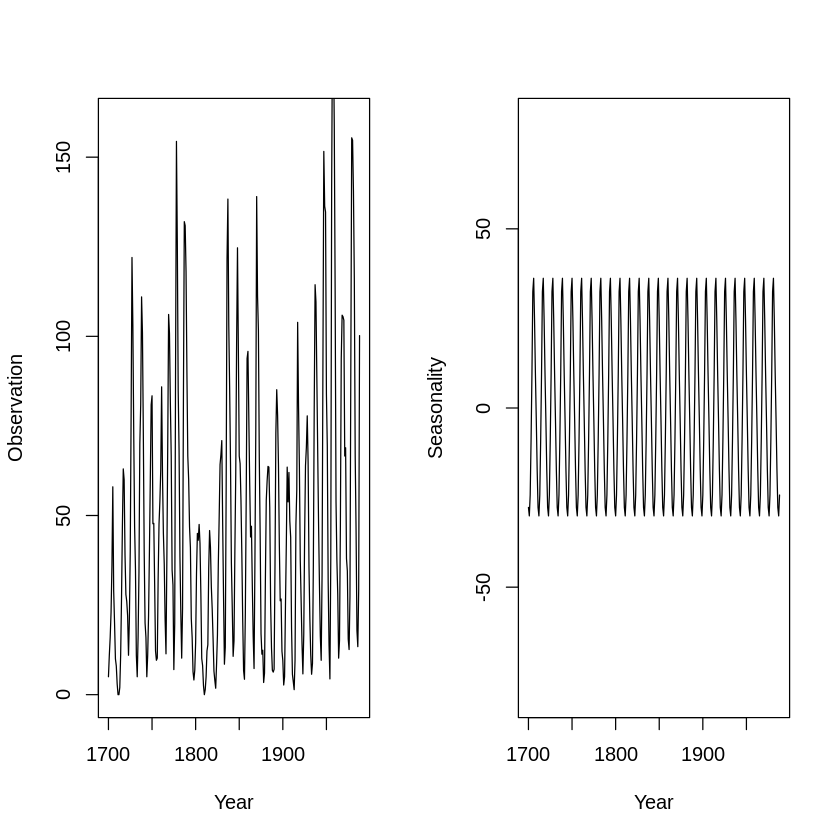

In [14]:
# 図1.8_太陽の黒点の個数とその季節成分
data(sunspot.year)
Sunspot<-ts(sunspot.year,frequency=11)
stl <- stl(Sunspot,s.window="per", robust=TRUE)
plot(sunspot.year)
season.ts <- ts(stl[1]$time.series[,1],frequency=1, ,start=c(1700,1))
par(mfrow=c(1,2))
ts.plot(sunspot.year,xlab="Year", ylab="Observation", ylim=c(0,160))
ts.plot(season.ts, xlab="Year",ylab="Seasonality", ylim=c(-80,80))

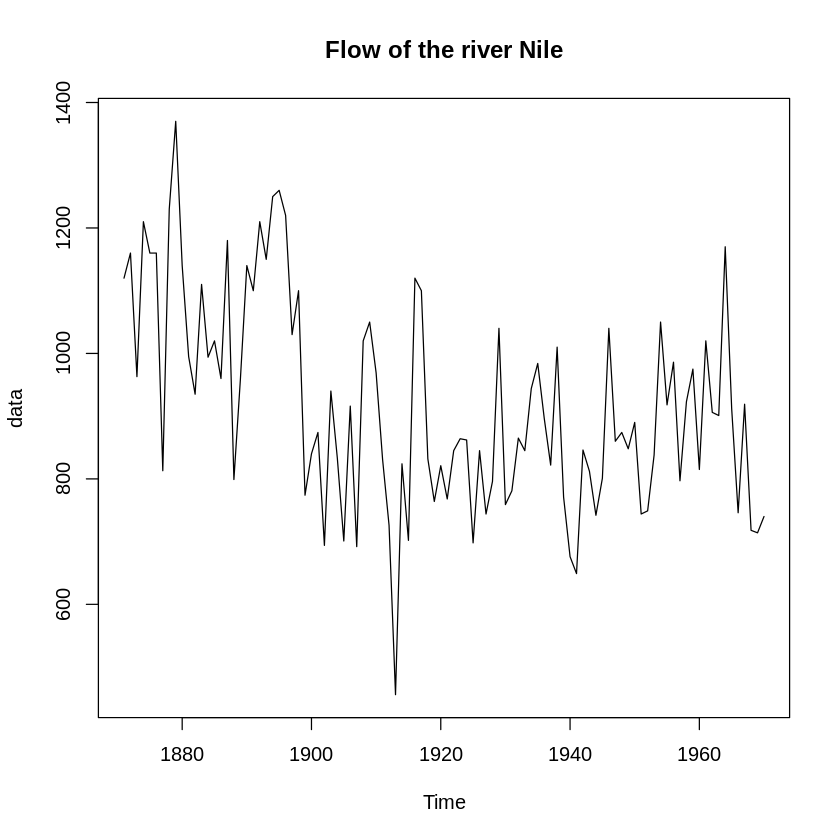

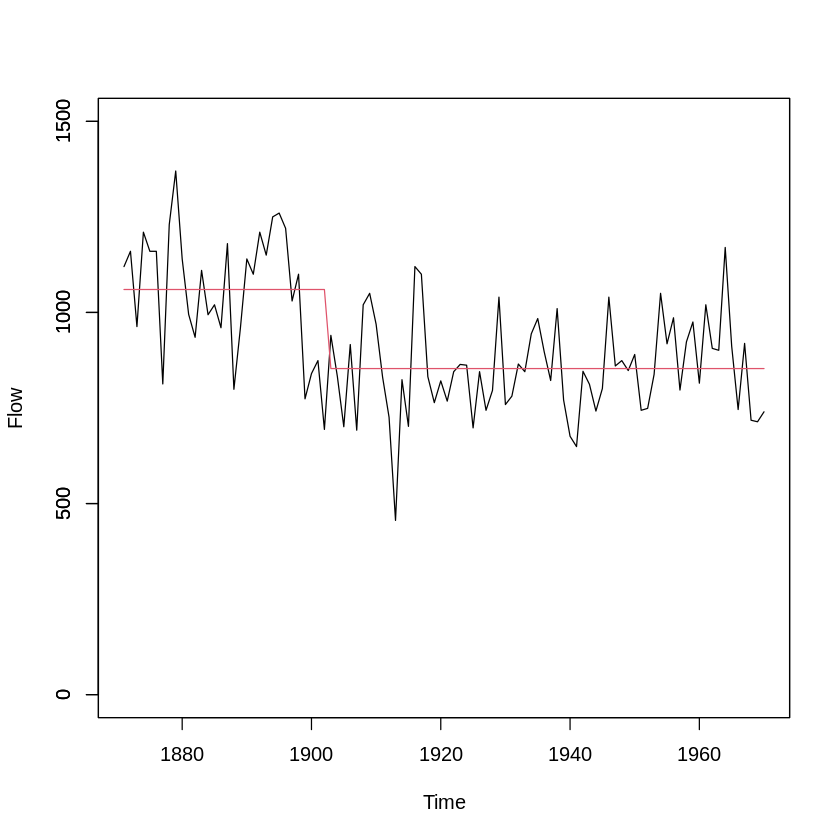

In [15]:
# 図1.9_アスワンダム完成（1902年）によるナイル川の流量変化（赤線）
par(mfrow=c(1,1))
data<-ts(Nile, start=1871)
plot(data,  main="Flow of the river Nile")
x<-c(rep(0, length = 1902-1871+1), rep(1,1970-1902))
x <-ts(x)
fit <- glm(data ~x, family=gaussian)
pred <- predict(fit)  #予測
plot(data, ylim=c(0,1500),xlab="Time", ylab="Flow")
par(new=T)
plot(pred, ylim=c(0,1500),xlab="", ylab="", type="l", col=2,xaxt = "n")